In [15]:
from models import MeshModel
import jax
from jax.typing import ArrayLike
from models.spots import v_spot
from models import MeshModel, IcosphereModel
import jax.numpy as jnp
from jax.typing import ArrayLike
from models.mesh_transform import add_rotation, evaluate_rotation
from plots import plot_3D, plot_2D
from spectrum import simulate_spectrum, blackbody_intensity
from spectrum.spectrum_korg import flux
from functools import partial
from models.spots import add_spots

m = IcosphereModel.construct(1000, 1., 1., 1., jnp.concatenate([jnp.array([jnp.log10(7000)]), jnp.ones(91)*0.5]))

In [16]:
s = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([0.1]),
              radii=jnp.array([1.]),
              radius_factors=jnp.array([1.]),
              param_indices=jnp.array([0]))

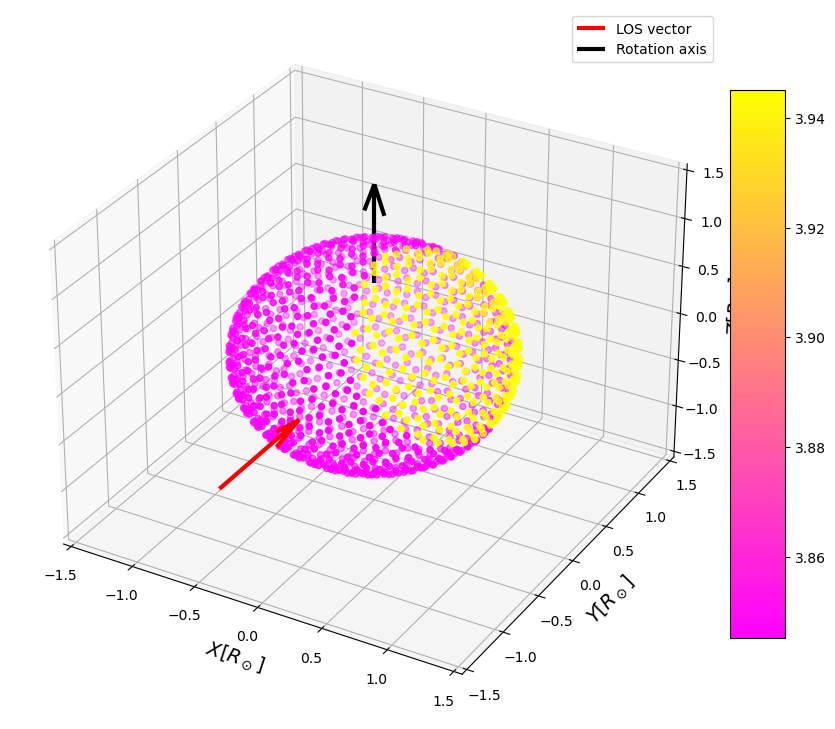

In [17]:
plot_3D(s, 0, cmap='spring');

In [18]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [19]:
bi = blackbody_intensity(jnp.log10(jnp.linspace(1000., 15000., 100)), 0., [np.log10(7000)])
i = simulate_spectrum(blackbody_intensity, m, jnp.log10(jnp.linspace(1000., 15000., 100)))

In [20]:
wvs = jnp.linspace(0000., 30000., 100)
bi1 = blackbody_intensity(jnp.log10(wvs), 0., [np.log10(3500)])
bi2 = blackbody_intensity(jnp.log10(wvs), 0., [np.log10(3000)])

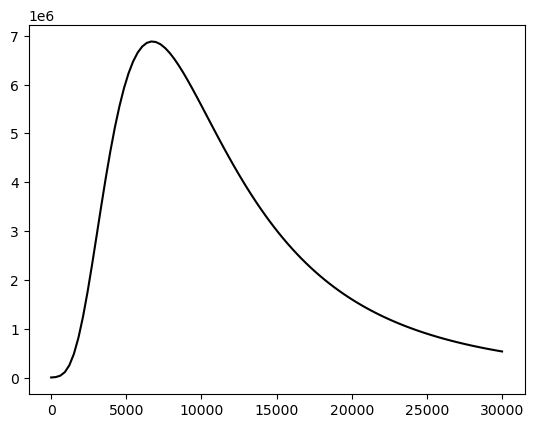

In [21]:
plt.plot(wvs, i[:, 0], color='black', label='Blackbody spectrum')

In [8]:
spectrum = flux(
    jnp.log10(jnp.linspace(1000., 15000., 1)),
    0.5,
    0.5*jnp.ones(92)
)

In [9]:
from spectrum.spectrum import spectrum_flash_sum
from spectrum.spectrum_korg import flux

In [10]:
spectrum_flash_sum(flux,
                   jnp.log10(jnp.linspace(1000., 15000., 100)),
                   jnp.array([0.5]),
                   jnp.array([0.5]),
                   0.5,
                   jnp.array([0.5*jnp.ones(92)]))

Array([[1.69438835e+15, 1.20819787e+14],
       [2.03080106e+15, 1.45305153e+14],
       [1.80036748e+15, 1.28631787e+14],
       [2.10287934e+15, 1.49578628e+14],
       [2.24218459e+15, 1.59368721e+14],
       [2.68338202e+15, 1.94577252e+14],
       [2.54320744e+15, 1.78762109e+14],
       [2.75900297e+15, 1.97110679e+14],
       [2.03231638e+15, 1.44089157e+14],
       [2.16952005e+15, 1.53547614e+14],
       [2.32871060e+15, 1.71995287e+14],
       [1.56354513e+15, 1.17778984e+14],
       [2.38159883e+15, 1.67712903e+14],
       [1.64790728e+15, 1.17715893e+14],
       [1.51248683e+15, 1.09963444e+14],
       [1.52494827e+15, 1.14335427e+14],
       [1.78923586e+15, 1.27838821e+14],
       [1.94642361e+15, 1.37681921e+14],
       [2.10638994e+15, 1.49032077e+14],
       [2.30380274e+15, 1.62380231e+14],
       [3.11559880e+15, 2.18534731e+14],
       [3.00456504e+15, 2.26982462e+14],
       [3.30570479e+15, 2.31832486e+14],
       [3.35994459e+15, 2.33880364e+14],
       [3.358597

In [11]:
#si = simulate_spectrum(blackbody_intensity, s, jnp.log10(jnp.linspace(1000., 15000., 100)))
k_si = simulate_spectrum(flux, s, jnp.log10(jnp.linspace(1000., 15000., 100)))

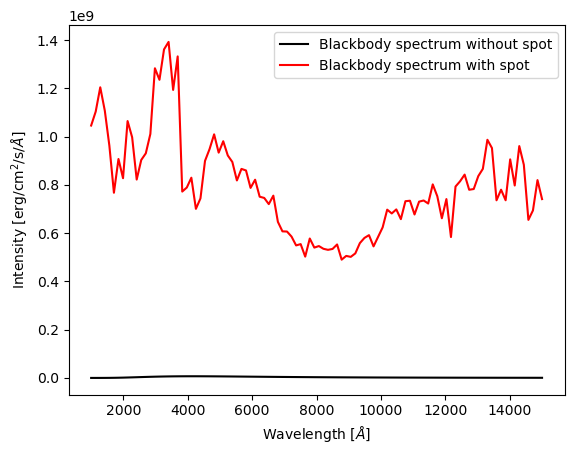

In [12]:
plt.plot(jnp.linspace(1000., 15000., 100), i[:, 1], color='black', label='Blackbody spectrum without spot');
plt.plot(jnp.linspace(1000., 15000., 100), k_si[:, 1], color='red', label='Blackbody spectrum with spot');

plt.gca().set_ylabel('Intensity [erg/cm$^2$/s/$\AA$]')
plt.gca().set_xlabel('Wavelength [$\AA$]')
plt.legend();

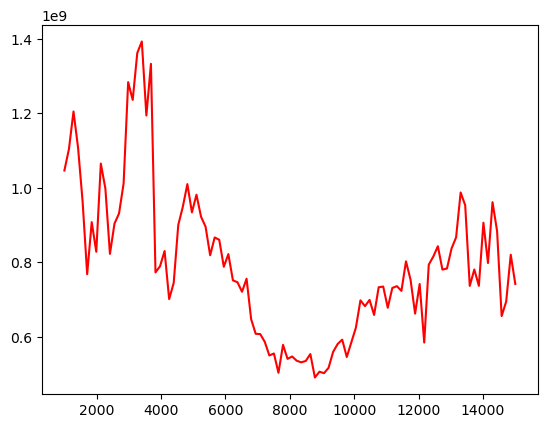

In [13]:
plt.plot(jnp.linspace(1000., 15000., 100), k_si[:, 1], color='red', label='Blackbody spectrum with spot');

In [14]:
# shouldn't it be two peaks for spots?